# Detecting key modulation using variational inference

### The model

Given a dataset $S$ of samples of the form $(n,t)$ where $n$ is a note and $t$ is the time instant that note occurs, organized in histograms as $(h_t)_{t=1}^T$ where $h_t$ is a vector storing the number of occurrences of each note at time $t$, assign to each time instant $t$ a region $z_t \in \{1..R\}$, with each region $r$ assigned a key $k_r \in \{1..K\}$ such that notes at time $t$ are assumed to be generated by the key at the region $t$ belongs to. The complete data likelihood is given by
$$p(S,Z,K|F,\lambda, \mu, \tau) = p(K|F) \prod_{t=1}^T p(z_t|\lambda) p(t|z_t, \mu, \tau) p(h_t|z_t,t) = \prod_{r=1}^R \prod_{k=1}^K f_{rk}^{k_{rk}} \prod_{t=1}^T \left[ \lambda_r \prod_{n=1}^N \left[\mathcal{N}(t|\mu_r, \tau^{-1}) \prod_{k=1}^K p(n|k)^{k_{rk}} \right]^{h_{nt}} \right]^{z_{tr}}.$$
The model parameters have the prior distributions
$$p(F) = \prod_{r=1}^R \text{Dir}(f_r|u^F), \ p(\lambda) = \text{Dir}(\lambda|u^\lambda), \ p(\mu, \tau) = \text{Ga}(\tau|a_0, b_0) \prod_{r=1}^R \mathcal{N}(\mu_r|\mu_{0r}, (\eta_0 \tau)^{-1}).$$
We approximate the posterior distribution $p(Z,K,F,\lambda, \mu, \tau|S)$ by another distribution $q(Z,K,F,\lambda, \mu, \tau) = q(Z,K) q(F,\lambda, \mu, \tau)$ and optimize for $q$, yielding
$$\ln q(Z,K) = \langle \ln p(S,Z,K|F,\lambda, \mu, \tau) \rangle_{q(F,\lambda, \mu, \tau)} + \text{const} = \sum_{r=1}^R \sum_{k=1}^K k_{rk} \langle f_{rk} \rangle_{q(F,\lambda, \mu, \tau)} + \sum_{t=1}^T z_{tr} k_{rk} \left[ \langle \ln \lambda_r \rangle_{q(F,\lambda, \mu, \tau)} + \sum_{n=1}^N h_{nt} \left[ - \frac{1}{2}(\langle \tau \mu_r^2 \rangle_{q(F,\lambda, \mu, \tau)} - 2 t \langle \tau \mu_r \rangle_{q(F,\lambda, \mu, \tau)}) + \ln p(n|k) \right] \right] + \text{const},$$
$$\ln q(F,\lambda, \mu, \tau) = \sum_{r=1}^R \sum_{k=1}^K \ln f_{rk} \left[u^F + \langle k_{rk} \rangle_{q(Z,K)} \right] + \sum_{r=1}^R \ln \lambda_r \left[u^\lambda + \sum_{t=1}^T \langle z_{tr} \rangle_{q(Z,K)} \right] + (a_0 + \frac{R + \sum_{r=1}^R \sum_{t=1}^T h_t \left \langle z_{tr} \right \rangle_{q(Z,K)}}{2} - 1) \ln \tau - b_0 \tau - \frac{\tau}{2} \sum_{r=1}^R \left [ \eta_0 (\mu_r - \mu_{0r})^2 + \sum_{t=1}^T h_t \left \langle z_{tr} \right \rangle_{q(Z,K)} (t- \mu_r)^2 \right ] + \text{const}$$
which further split into $q(Z,K) = q(K)q(Z|K)$ and $q(F,\lambda, \mu, \tau) = q(F) q(\lambda) q(\mu|\tau) q(\tau)$ with
$$q(F) = \prod_{r=1}^R \text{Dir}(f_r | u^F + \langle k_{r} \rangle_{q(Z,K)}), q(\lambda) = \text{Dir}(\lambda | u^\lambda + \sum_{t=1}^T \langle z_{tr} \rangle_{q(Z,K)}),$$
$$q(\mu|\tau) = \prod_{r=1}^R \mathcal{N}(\mu_r|\hat{\mu}_r, ((\eta_0 + N_r ) \tau )^{-1}), q(\tau) = \text{Ga}(a_0+\frac{h}{2}, b_0 + \sum_{r=1}^R \left[ \frac{\eta_0 \bar N_r}{\eta_0+N_r} (\bar \mu_r - \mu_{0r})^2 + \bar N_r \bar \sigma_r^2\right])$$
where $h_t = \sum_{n=1}^N h_{nt}$, $h = \sum_{t=1}^T h_t$, $\bar N_r = \sum_{t=1}^T h_t \left \langle z_{tr} \right \rangle$, $\bar \mu_r = \frac{1}{\bar N_r} \sum_{t=1}^T h_t t \left \langle z_{tr} \right \rangle$, $\bar \sigma_r^2 = \frac{1}{\bar N_r} \sum_{t=1}^T (t - \bar \mu_r)^2 h_t \left \langle z_{tr} \right \rangle$ and $\hat{\mu}_r = \frac{\eta_0 \mu_{0r} + \bar N_r \bar \mu_r}{\eta_0 + \bar N_r}$. The expected model parameters under these distributions are 
$$\langle \ln f_{rk} \rangle = \psi(\hat u^{f_r}_k) - \psi(\sum_{k=1}^K \hat u^{f_r}_k), \langle \ln \lambda_r \rangle = \psi(\hat u^{\lambda}_r) - \psi(\sum_{r=1}^R \hat u^{\lambda}_r),$$
$$\langle \tau \rangle = \frac{\hat a}{\hat b}, \langle \tau \mu_r \rangle = \frac{\hat a}{\hat b} \hat \mu_r, \langle \tau \mu_r^2 \rangle = \frac{\hat a}{\hat b} \hat \mu_r^2 + \hat \eta_r^{-1}$$
where $\hat u^{f_r}$, $\hat u^\lambda$, $(\hat \mu_r, (\hat \eta_r \tau)^{-1})$ and $(\hat a, \hat b)$ are the parameters of the distributions $q(f_r)$, $q(\lambda)$, $q(\mu_r|\tau)$ and $q(\tau)$ given above.

For now, approximate $q(Z,K)$ further into $q(Z)q(K)$ with 
$$\ln q(Z) = \sum_{t=1}^T \sum_{r=1}^R z_{tr} \left[\langle \ln \lambda_r \rangle + h_t \left[ - \frac{1}{2}(\langle \tau \mu_r^2 \rangle_{q(F,\lambda, \mu, \tau)} - 2 t \langle \tau \mu_r \rangle_{q(F,\lambda, \mu, \tau)}) + \sum_{k=1}^K \langle k_{rk} \rangle \sum_{n=1}^N h_{nt} \ln p(n|k) \right] \right] + \text{const}$$
$$\ln q(K) = \sum_{r=1}^R \sum_{k=1}^K k_{rk} \left[ \langle \ln f_{rk} \rangle + \sum_{t=1}^T \langle z_{tr} \rangle \sum_{n=1}^N h_{nt} \ln p(n|k) \right] + \text{const}$$
yielding
$$\langle z_{tr} \rangle = \sigma(\psi(\hat u^\lambda_r) - h_t \frac{\hat a}{2 \hat b} (t - \hat \mu_r)^2 - \frac{h_t}{2\hat\eta_r} + \sum_{k=1}^K \langle k_{rk} \rangle \sum_{n=1}^N h_{nt} \ln p(n|k))$$
$$\langle k_{rk} \rangle = \sigma(\psi(\hat u^{f_r}_k) + \sum_{t=1}^T \langle z_{tr} \rangle \sum_{n=1}^N h_{nt} \ln p(n|k))$$
where $\sigma$ denotes the softmax function.

The variational free energy minimized by the above variational distributions is given by
$$\mathcal{F}[q] = \langle \ln \frac{p(S,Z,K,F,\lambda,\mu,\tau)}{q(Z,K,F,\lambda,\mu,\tau)} \rangle_q = -D_{KL}(q(F)q(\lambda)q(\tau)q(\mu|\tau)\|p(F)p(\lambda)p(\tau)p(\mu|\tau)) - \langle D_{KL}(q(Z)q(K)\|p(Z|\lambda)p(K|F)) \rangle_{q(F)q(\lambda)} + \langle \langle \ln p(S|Z,K,\mu,\tau) \rangle_{q(Z)q(K)} \rangle_{q(F)q(\lambda)} = - \left[ \sum_{r=1}^R D_{KL}(q(f_r)|p(f_r)) + D_{KL}(q(\lambda)\|p(\lambda)) + D_{KL}(q(\tau)\|p(\tau)) + \sum_{r=1}^R \langle D_{KL}(q(\mu_r|\tau)\|p(\mu_r|\tau)) \rangle_{q(\tau)} + \sum_{t=1}^T D_{KL}(q(z_t)\|p(z_t)) + \sum_{r=1}^R  D_{KL}(q(k_r)\|p(k_r)) \right] + \langle \langle \ln p(S|Z,K,\mu,\tau) \rangle_{q(Z)q(K)} \rangle_{q(F)q(\lambda)q(\mu,\tau)}$$
with
$$D_{KL}(q(f_r)|p(f_r)) = \ln \frac{\Gamma(\hat u^{f_r}_0)}{\Gamma(K u^F)} - \sum_{k=1}^K \ln \frac{\Gamma(\hat u^{f_r}_k)}{\Gamma(u^F)} + (\hat u^{f_r}_k - u^F)(\psi(\hat u^{f_r}_k) - \psi(\hat u^{f_r}_0))$$
$$D_{KL}(q(\lambda)\|p(\lambda)) = \ln \frac{\Gamma(\hat u^{\lambda}_0)}{\Gamma(R u^\lambda)} - \sum_{r=1}^R \ln \frac{\Gamma(\hat u^{\lambda}_r)}{\Gamma(u^\lambda)} + (\hat u^\lambda_r - u^\lambda)(\psi(\hat u^{\lambda}_r) - \psi(\hat u^\lambda_0))$$
$$D_{KL}(q(\tau)\|p(\tau)) = a_0 \ln \frac{b_0}{\hat b} - \ln \frac{\Gamma(a_0)}{\Gamma(\hat a)} + (a_0 - \hat a) \psi(\hat a) - \hat a \frac{b_0 - \hat b}{\hat b}$$
$$\langle D_{KL}(q(\mu_r|\tau)\|p(\mu_r|\tau)) \rangle_{q(\tau)} =  \frac{1}{2} \ln \frac{\eta_0}{\hat \eta_r} -\frac{\eta_0 \hat a}{2 \hat b} (\hat \mu_r - \mu_{0r})^2 - \frac{1}{2 \hat \eta_r} + \frac{1}{2}$$
$$\langle \langle \ln p(S|Z,K,\mu,\tau) \rangle_{q(Z)q(K)} \rangle_{q(F)q(\lambda)q(\mu,\tau)} = \sum_{t=1}^T h_t \sum_{r=1}^R \langle z_{tr} \rangle \left[ \langle \ln \mathcal{N}(t|\mu_r, \tau^{-1}) \rangle_{q(\mu,\tau)} + \sum_{k=1}^K \langle k_{rk} \rangle \sum_{n=1}^N h_{nt} \ln p(n|k) \right]$$
$$\langle \ln \mathcal{N}(t|\mu_r, \tau^{-1}) \rangle_{q(\mu,\tau)} = \frac{1}{2} \langle \ln \tau \rangle - \frac{1}{2} \ln 2\pi - \frac{1}{2} (t^2 \langle\tau\rangle - 2 t \langle\tau\mu_r\rangle + \langle\tau\mu_r^2\rangle) = \frac{1}{2}(\psi(\hat a) - \ln\hat b) - \frac{1}{2} \ln 2\pi - \frac{\hat a}{2 \hat b}(t-\hat \mu_r)^2 - \frac{1}{2\hat\eta_r}$$

We can then calculate the amount by which the free energy decreases after updating each parameter:
$$\Delta\mathcal{F}_Z[q] = \sum_{t=1}^T \left[ -\Delta \langle D_{KL}(q(z_t)\|p(z_t|\lambda)) \rangle_{q(\lambda)} + h_t \sum_{r=1}^R \Delta\langle z_{tr} \rangle \left[ \langle \ln \mathcal{N}(t|\mu_r, \tau^{-1}) \rangle_{q(\mu,\tau)} + \sum_{k=1}^K \langle k_{rk} \rangle \sum_{n=1}^N h_{nt} \ln p(n|k) \right] \right]$$
$$\Delta\mathcal{F}_K[q] = \sum_{r=1}^R \left[-\Delta \langle D_{KL}(q(k_r)\|p(k_r|f_r)) \rangle_{q(f_r)} + \sum_{t=1}^T h_t \langle z_{tr} \rangle \sum_{k=1}^K \Delta\langle k_{rk} \rangle \sum_{n=1}^N h_{nt} \ln p(n|k) \right]$$
$$\Delta\mathcal{F}_F[q] = \sum_{r=1}^R \left[\Delta D_{KL}(q(f_r)\|p(f_r)) + \sum_{k=1}^K \langle k_{rk} \rangle \Delta \ln f_{rk} \right]$$
$$\Delta\mathcal{F}_\lambda[q] = \Delta D_{KL}(q(\lambda)\|p(\lambda)) + \sum_{t=1}^T \sum_{r=1}^R \langle z_{tr} \rangle \Delta \ln \lambda_r$$
$$\Delta\mathcal{F}_{\mu\tau}[q] = \Delta D_{KL}(q(\tau)\|p(\tau)) + \Delta \langle D_{KL}(q(\mu_r|\tau)\|p(\mu_r|\tau)) \rangle_{q(\tau)} + \sum_{t=1}^T h_t \sum_{r=1}^R \langle z_{tr} \rangle \Delta\langle \ln \mathcal{N}(t|\mu_r, \tau^{-1}) \rangle_{q(\mu,\tau)}$$

For better results and more stable optima, we can also apply deterministic annealing to scale the log likelihood by an inverse temperature $\beta$, initially low and increasing geometrically after each application of variational Bayesian EM. With this the variational distributions are modified as follows:
$$q(F) = \prod_{r=1}^R \text{Dir}(f_r | \beta ( u^F + \langle k_{r} \rangle_{q(Z,K)})), q(\lambda) = \text{Dir}(\lambda | \beta ( u^\lambda + \sum_{t=1}^T \langle z_{tr} \rangle_{q(Z,K)})),$$
$$q(\mu|\tau) = \prod_{r=1}^R \mathcal{N}(\mu_r|\hat{\mu}_r, ((\eta_0 + N_r ) \beta \tau )^{-1}), q(\tau) = \text{Ga}(\beta a_0+\frac{\beta h + (\beta-1)R }{2}-\beta+1, \beta \left( b_0 + \sum_{r=1}^R \left[ \frac{\eta_0 \bar N_r}{\eta_0+N_r} (\bar \mu_r - \mu_{0r})^2 + \bar N_r \bar \sigma_r^2\right]\right))$$
$$\ln q(Z) = \sum_{t=1}^T \sum_{r=1}^R z_{tr} \beta\left[\langle \ln \lambda_r \rangle + h_t \left[ - \frac{1}{2}(\langle \tau \mu_r^2 \rangle_{q(F,\lambda, \mu, \tau)} - 2 t \langle \tau \mu_r \rangle_{q(F,\lambda, \mu, \tau)}) + \sum_{k=1}^K \langle k_{rk} \rangle \sum_{n=1}^N h_{nt} \ln p(n|k) \right] \right] + \text{const}$$
$$\ln q(K) = \sum_{r=1}^R \sum_{k=1}^K k_{rk} \beta\left[ \langle \ln f_{rk} \rangle + \sum_{t=1}^T \langle z_{tr} \rangle \sum_{n=1}^N h_{nt} \ln p(n|k) \right] + \text{const}$$

In [2]:
import numpy as np
from scipy.special import logsumexp, digamma
import sklearn as skl

from music21 import *

In [3]:
import matplotlib.pyplot as plt

In [4]:
import freqsarray as arr

In [5]:
reload(arr)

<module 'freqsarray' from 'freqsarray.pyc'>

In [103]:
class Modulation(skl.base.BaseEstimator, skl.base.TransformerMixin):
    def __init__(self, table, R=5, uf0=1., ul0=1., eta0=1., a0=1., b0=1., maxiter=10, quantize=None,
                 anneal=False, T_max=10, iters=20, alpha=.9):
        self.R = R
        self.uf0, self.ul0, self.eta0, self.a0, self.b0 = uf0, ul0, eta0, a0, b0
        self.nk = logprobs(table) # TODO KxN matrix storing ln p(n|k)
        # uf0 may be calculated from instances of each k in table
        self.maxiter = maxiter
        self.quantize = quantize # smooth histogram by adding up every note each r beats
        
        if not anneal:
            iters = T_max = alpha = 1
        self.anneal = anneal # whether to do deterministic annealing
        self.T_max = T_max # max temperature of deterministic annealing
        self.iters = iters # no of iterations of deterministic annealing
        self.alpha = alpha # temperature decay
    
    def fit(self, X, ts=None):
        '''Convert sample input to histogram of notes indexed by time, run VBEM until convergence.'''
        if not isinstance(X, np.ndarray):
            # TODO move to separate function or method of Sample
            ms = list(list(m.notes) for m in X.measures()) # list of measures, simplify later
            X = np.array(map(histogram, ms)) # histograms of each measure
        if ts is not None and self.quantize is not None:
            T, T1 = X.shape[0], int(np.ceil(ts[-1]/self.quantize))
            # construct 0-1 matrix of dimension T1xT, apply it to X
            trX = np.zeros((T1,T))
            t = 0
            for i in xrange(T):
                trX[int(t/self.quantize), i] = 1
                t = ts[i]
            X = trX.dot(X)
            ts = self.quantize*(np.arange(T1)+.5)
        
        # precalculate quantities
        T, N = X.shape                         # total duration of sample
        K = arr.K                              # number of keys
        kr = self.nk.dot(X.T)                  # KxT matrix storing probability of each time instant for each key
        ht = X.sum(axis=1).reshape(-1,1)       # no of notes at each time instant
        if ts is None:
            ts = np.arange(T)+.5               # time instants
        ts = ts.reshape(-1,1)
        self.X = X
        self.ht = ht.copy()
        self.kr = kr
        self.m0 = (np.arange(self.R) + .5)/self.R*ts[-1]
        # ht[:] = 1
        self.ts = ts
        
        # perhaps multiply uf, ul etc. by beta
        self.w = np.zeros((T, self.R))         # w[t, r] stores expectation of z_tr
        self.k = np.ones((self.R,K))/K         # k[r, k] stores expectation of k_rk
        self.uf = np.full((self.R,K), self.uf0)# uf[r, k] stores u^{f_r}_k
        self.ul = np.full(self.R, self.ul0)    # ul[r] stores u^\lambda_r
        # self.c = np.log(np.ones(self.R)/self.R)# c[r] stores expectation of ln lambda_r
        self.m = self.m0.copy()                # m[r] stores \hat \mu_r
        self.e = np.full(self.R, self.eta0)    # \hat \eta
        self.a = self.a0                       # \hat a
        self.b = self.b0                       # \hat b
        # self.a = np.full(self.R, self.a0)      # \hat a
        # self.b = np.full(self.R, self.b0)      # \hat b
        # scale common variance
        # self.b = self.a * (T/self.R)**2
        self.a += ht.sum()/2
        
        f = 0 # TODO calculate initial free energy, noting q(F,lam,mu,tau) initialized to priors
        self.params = []
        
        self.T = self.T_max
        for t in xrange(self.iters):
            
            # loop until convergence
            for _ in xrange(self.maxiter):
                df = 0
                # E step: calculate w and k until converged
                for _ in xrange(1): # xrange(self.maxiter):
                    w1, k1 = self.w, self.k
                    ps = digamma(self.ul) + ht*(-.5*(self.a/self.b*(ts-self.m)**2 + 1/self.e) + self.k.dot(kr).T)
                    # ps = digamma(self.ul) + (-.5*(self.a/self.b*(ts-self.m)**2 + 1/self.e) + self.k.dot(kr).T)
                    self.w = self.softmax(ps, self.T, axis=1)
                    #df1 = self.vbez_diff(w1, ps)
                    ps = digamma(self.uf) + self.w.T.dot(kr.T)
                    self.k = self.softmax(ps, self.T, axis=1)
                    #df1 += self.vbek_diff(k1, ps)
                    #df += df1 # accumulate differences
                    # if np.norm(df1) < self.delta:
                    #     break

                # M step
                uf1, ul1 = self.uf, self.ul
                self.uf = (self.uf0 + self.k) / self.T
                self.ul = (self.ul0 + self.w.sum(axis=0)) / self.T
                #df += self.vbmf_diff(uf1) + self.vbml_diff(ul1) # f and lambda have no direct interaction terms

                # \bar N_r, \bar \mu_r, \bar \sigma_r^2
                nr = ht.T.dot(self.w)
                m  = ht.T.dot(self.w*ts)/nr
                vs = ht.T.dot(self.w*(ts-self.m)**2)/nr

                a1, b1 = self.a, self.b
                self.a = (self.a0 + ht.sum()/2)/self.T + (self.R/2-1)*(1-1./self.T) # nr/2
                self.b = (self.b0 + ((1/self.eta0+1/nr)**-1 *(m-self.m0)**2 + nr*vs).sum())/self.T
                #df += self.vbmt_diff(a1, b1)

                e1, m1 = self.e, self.m
                self.e = self.eta0+nr
                self.m = (self.eta0*self.m0 + nr*m)/self.e
                self.e = self.e/self.T
                #df += self.vbmm_diff(e1, m1)

                # TODO calculate free energy drop, if small enough break
                # if np.norm(df) < self.delta:
                #     break
                #f += df
                # log free energies

                self.params.append((self.w.copy(), self.k.copy(), self.uf.copy(), self.ul.copy(), 
                                    self.a.copy(), self.b.copy(), self.e.copy(), self.m.copy()))
            
            self.T *= self.alpha
        
        return self
    
    def softmax(self, r, T=1, axis=None):
        r = r/T # maybe if T is too low just return a sharp 1-0 array
        return np.exp(r - logsumexp(r, axis=axis, keepdims=True))
    
    def vbez_diff(self, w1, ps):
        'Calculate free energy drop given old w.'
        dw = self.w - w1
        dwlogw = self.w*np.log(self.w) - w1*np.log(w1)
        return (-dwlogw + dw*ps).sum()
    
    def vbek_diff(self, k1, ps):
        'Calculate free energy drop given old k.'
        dk = self.k - k1
        dklogk = self.k*np.log(self.k) - k1*np.log(k1)
        return (-dklogk + dk*ps).sum()
    
    def vbmf_diff(self, f1):
        'Calculate free energy drop given old f.'
        pass
    
    def vbml_diff(self, l1):
        'Calculate free energy drop given old lambda.'
        pass
    
    def vbmt_diff(self, t1):
        'Calculate free energy drop given old tau.'
        pass
    
    def vbmm_diff(self, m1):
        'Calculate free energy drop given old mu.'
        pass
    
    def keys(self, epoch=-1):
        'Return array of active keys and the probability of each active key as a function of time.'
        # construct p(r|t) \propto p(r) p(t|r), calculate p(k|t) = \sum p(k|r) p(r|t)
        ps = digamma(self.ul) - .5*self.ht*(self.a/self.b*(self.ts-self.m)**2 + 1/self.e)
        ps = np.exp(ps - logsumexp(ps, axis=1).reshape(-1,1))
        ps = ps.dot(self.k)
        
        # identify 'active' keys, i.e. those that maximize p(k|t) for at least one t
        keys = np.unique(np.argmax(ps, axis=1))
        keys = keys[np.argsort(ps.sum(axis=0)[keys])[::-1]]
        
        # ps = ps.dot(self.k[:,keys])
        
        return keys, ps[:,keys]

In [104]:
### Histogram analysis for easier recognition of keys, chords, themes, etc.

# TODO use arrays here

from math import *

def findkey(table, s):
    'Return the most likely key of a sample, given probability table.'
    h = histogram(s)
    return max((loglikelihood(table, h, k), k) for k in freqs.keys)

def loglikelihood(table, h, k):
    'Return the log-likelihood of a histogram being in a particular key.'
    if not isinstance(h, freqs.Freq):
        h = histogram(h)
    return sum(log(table.nfreq[True, freqs.Tone(n, k)]) * h[n] for n in h) + log(table.kprob(k))

# TODO loglikelihood(table, hs) where hs.shape = (T,N) returning (T,K) matrix of probabilities
# just matrix multiplication by a matrix with (n,k) entry set to log p(n|k)

def histogram(s):
    'Construct a pitch histogram for a sample.'
    return s.get_matrix().sum(axis=0)

def logprobs(table):
    'Return KxN table storing ln p(n|k).'
    p = np.log(table.stats.ns + 1) - np.log((table.stats.ns+1).sum())
    return np.array([arr.transpose(p, k, False) for k in arr.keys])

def findkeyks(s):
    'Return the most likely key of a sample, using the Krumhansl-Schmuckler algorithm.'
    return s.cs.analyze('krumhansl')

def histtodict(h, i = 0):
    'Convert histogram to dictionary with numeric keys, optionally with offset.'
    return dict(((freqs.tones.index(str(n)) - i) % len(freqs.tones), h[n]) for n in h)

In [105]:
%%time
arr.table.train(corpus.getBachChorales()[400:440])

CPU times: user 534 ms, sys: 102 ms, total: 637 ms
Wall time: 715 ms


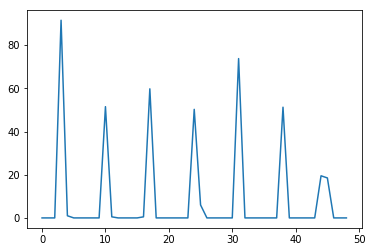

In [106]:
plt.plot(arr.table.stats.ns)

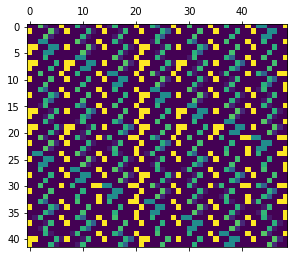

In [107]:
plt.matshow(logprobs(arr.table))

In [12]:
%%time
sc = arr.Sample('schumann/opus41no1/movement2', fromCorpus=True)

CPU times: user 2.95 s, sys: 74.6 ms, total: 3.02 s
Wall time: 3.05 s


In [13]:
sc.key

<music21.key.Key of a minor>

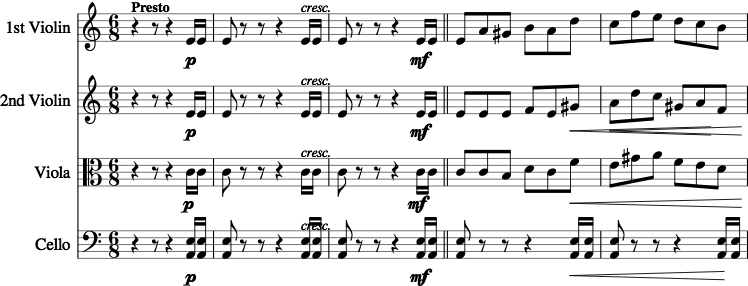

In [14]:
sc.s.measures(1,5).show()

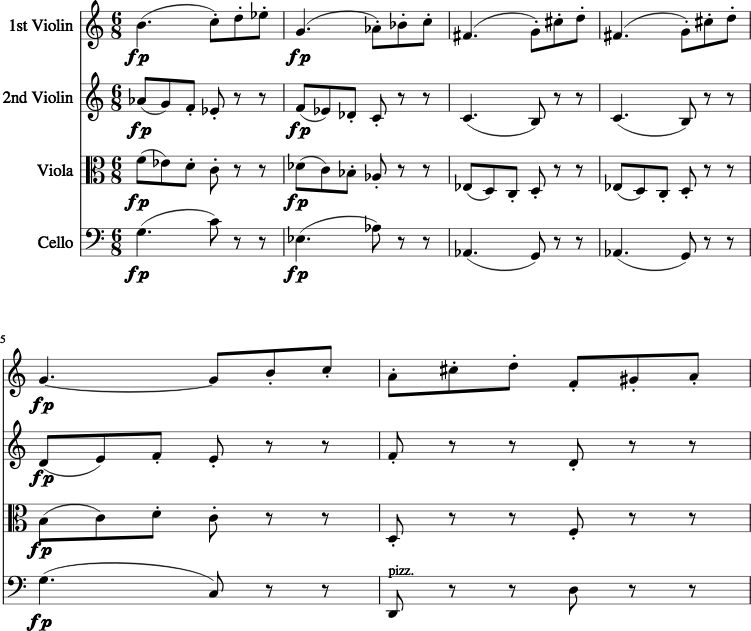

In [15]:
sc.s.measures(40,45).show()

In [109]:
sc.s.measures(40,45).analyze('key')

<music21.key.Key of c minor>

In [22]:
sc.s.show('musicxml')

In [110]:
%%time
mc, tc = sc.get_matrix()

CPU times: user 11 µs, sys: 17 µs, total: 28 µs
Wall time: 30 µs


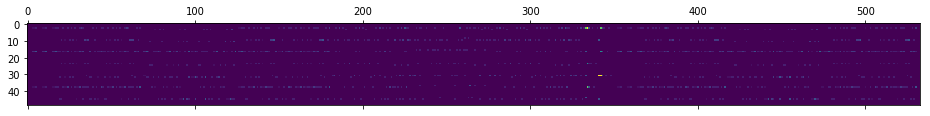

In [111]:
plt.matshow(mc.T)
plt.show()

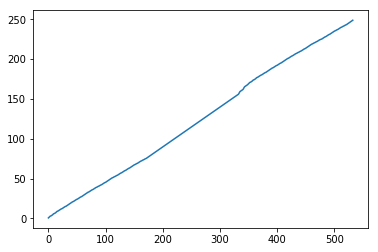

In [112]:
plt.plot(tc)
plt.show()

In [113]:
m = Modulation(arr.table, R=13, maxiter=20, a0=10., b0=10., quantize=3)

In [114]:
m.fit(mc, tc)

Modulation(R=13, T_max=1, a0=10.0, alpha=1, anneal=False, b0=10.0, eta0=1.0,
      iters=1, maxiter=20, quantize=3, table=None, uf0=1.0, ul0=1.0)

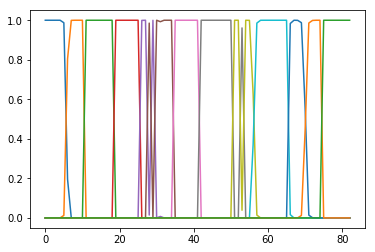

In [115]:
plt.plot(m.w) #==np.max(m.w, axis=1).reshape(-1,1))
plt.show()

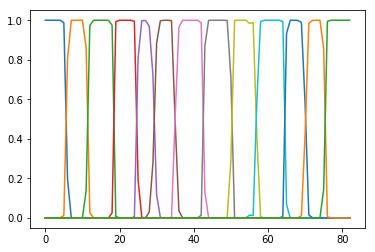

In [116]:
ps = digamma(m.ul) + m.ht*(-.5*(m.a/m.b*(m.ts-m.m)**2 + 1/m.e))
plt.plot(np.exp(ps - logsumexp(ps, axis=1).reshape(-1,1)))
plt.show()

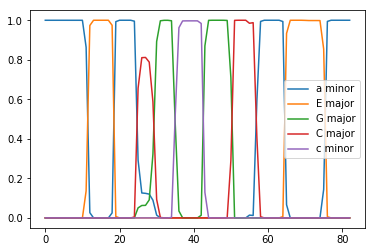

In [117]:
keys, kprobs = m.keys()
plt.legend(plt.plot(kprobs), [arr.keys[i] for i in keys], loc=0)
plt.show()

In [118]:
ma = Modulation(arr.table, R=13, maxiter=20, a0=10., b0=10., quantize=3, anneal=True, T_max=2, iters=15)

In [119]:
ma.fit(mc, tc)

Modulation(R=13, T_max=2, a0=10.0, alpha=0.9, anneal=True, b0=10.0, eta0=1.0,
      iters=15, maxiter=20, quantize=3, table=None, uf0=1.0, ul0=1.0)

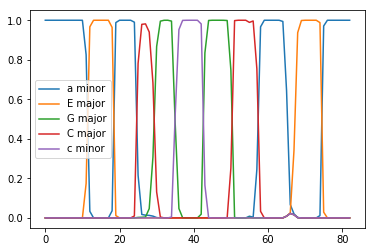

In [120]:
keys, kprobs = ma.keys()
plt.legend(plt.plot(kprobs), [arr.keys[i] for i in keys], loc=0)
plt.show()

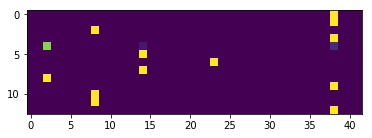

In [121]:
plt.imshow(m.uf)
plt.show()

In [122]:
%%time
sg = arr.Sample('beethoven/opus59no2/movement1', fromCorpus=True)

CPU times: user 4.02 s, sys: 552 ms, total: 4.57 s
Wall time: 4.87 s


In [60]:
%%time
mg, tg = sg.get_matrix()

CPU times: user 1min 18s, sys: 840 ms, total: 1min 19s
Wall time: 1min 24s


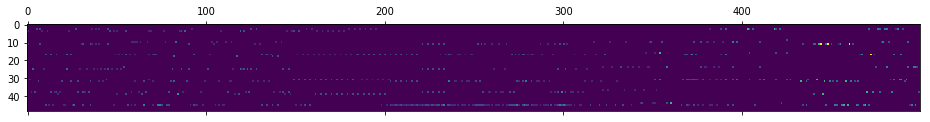

In [61]:
plt.matshow(mg[3000:3500].T)
plt.show()

In [68]:
%%time
m1 = Modulation(arr.table, R=20, maxiter=20, a0=100., b0=1., quantize=12, anneal=True, T_max=2, iters=20)
m1.fit(mg, tg)

CPU times: user 919 ms, sys: 11.2 ms, total: 930 ms
Wall time: 933 ms


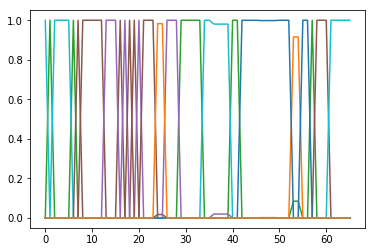

In [83]:
plt.plot(m1.w.dot(m1.k)) #==np.max(m.w, axis=1).reshape(-1,1))
plt.show()

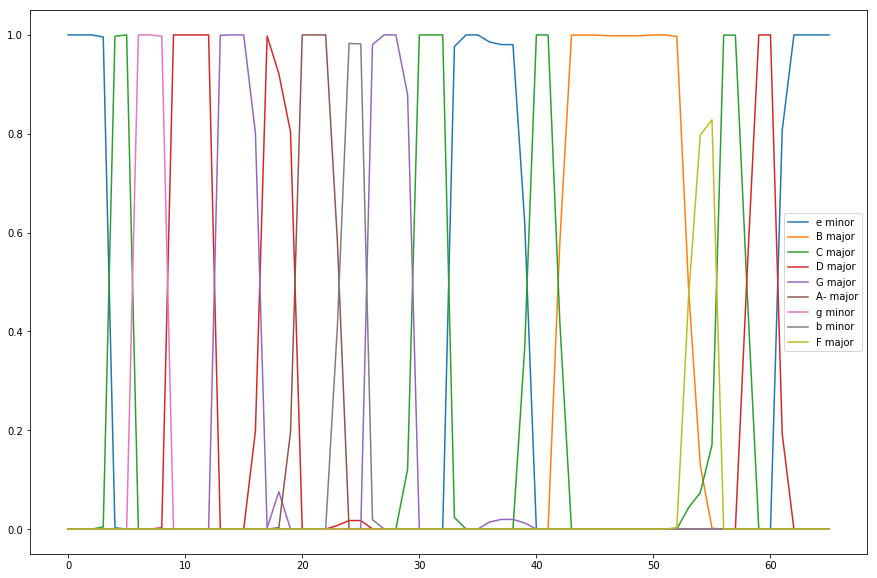

In [84]:
keys, kprobs = m1.keys()
plt.figure(figsize=(15,10))
plt.legend(plt.plot(kprobs), [arr.keys[i] for i in keys], loc=0)
plt.show()

In [85]:
keys = np.unique(np.argmax(m1.k, axis=1))

In [86]:
keys[np.argsort(m1.k.sum(axis=0)[keys])[::-1]]

array([ 2, 29,  5, 20, 14, 35, 15, 41, 11])

In [87]:
corpus.parse(corpus.getBachChorales()[156]).show('musicxml')

The main motivation for such a model is the assumption that transitions between keys are decidedly non-Markov — the piece spends time solely in one key for an extended period of time, and then moves to another key and stays in it. In fact, for most cases and for the above examples, different keys correspond to different thematic regions, e.g. scherzo vs. trio or the first theme in the tonic vs. the second theme in the dominant or relative major. To test this assumption, we also construct a Markov model for the same problem, in the form of an HMM with fixed states (keys in relation to the tonic) and accordingly fixed emission probabilities, and train the model again on a single sample using the Baum-Welch algorithm. 

In [98]:
class MarkovModulation(skl.base.BaseEstimator, skl.base.TransformerMixin):
    def __init__(self, table, maxiter=10, quantize=None, delta=.01):
        self.b = np.exp(logprobs(table)) # KxN matrix storing ln p(n|k)
        self.maxiter = maxiter
        self.quantize = quantize # smooth histogram by adding up every note each r beats
        self.delta = delta
    
    def fit(self, X, ts=None):
        # quantize, preprocess to skip t with X[t].sum() == 0
        if ts is not None and self.quantize is not None:
            T, T1 = X.shape[0], int(np.ceil(ts[-1]/self.quantize))
            # construct 0-1 matrix of dimension T1xT, apply it to X
            trX = np.zeros((T1,T))
            t = 0
            for i in xrange(T):
                trX[int(t/self.quantize), i] = 1
                t = ts[i]
            X = trX.dot(X)
            ts = self.quantize*(np.arange(T1)+.5)
        X = X[X.sum(axis=1) > 0]
        self.X = X / X.sum(axis=1).reshape(-1,1)
        
        # initialize transition matrix here
        self.a = np.ones((arr.K, arr.K)) / arr.K
        self.p0 = np.ones(arr.K) / arr.K
        
        for _ in xrange(self.maxiter):
            alpha, beta = self.forward_backward(X)
            ps = self.probs(alpha, beta)
            occs = self.occurrences(alpha, beta, X)
                
            self.a = (occs+self.delta).sum(axis=0) / (ps[:-1]+self.delta).sum(axis=0).reshape(-1,1)
            self.p0 = ps[0]
            
        return self
    
    def forward_backward(self, X):
        return self.forward(X), self.backward(X)
    
    def forward(self, X):
        T = X.shape[0]
        alpha = np.zeros((T+1, arr.K))
        alpha[0] = self.p0
        for t in xrange(T):
            alpha[t+1] = self.b.dot(X[t])*alpha[t].dot(self.a)
            alpha[t+1] = alpha[t+1] / alpha[t+1].sum()
        return alpha
    
    def backward(self, X):
        T = X.shape[0]
        beta = np.zeros((T+1, arr.K))
        beta[-1] = 1
        for t in reversed(xrange(T)):
            beta[t] = (beta[t+1]).dot(self.b.dot(X[t]))
            # beta[t] = beta[t] / beta[t].sum() # for normalization
        return beta
    
    def probs(self, alpha, beta):
        res = np.log(alpha) + np.log(beta) + self.delta
        return np.exp(res - logsumexp(res, axis=1).reshape(-1,1))
    
    def occurrences(self, alpha, beta, X):
        T = X.shape[0]
        emit = X.dot(self.b.T).reshape(T,1,-1)
        res = np.log(alpha[:-1]).reshape(T,-1,1) + np.log(self.a) + np.log(emit) + np.log(beta[1:]).reshape(T,1,-1)
        res = res + self.delta
        return np.exp(res - logsumexp(res, axis=(1,2)).reshape(-1,1,1))
    
    def keys(self, X):
        # calculate p(k_t)
        ps = self.probs(*self.forward_backward(X))[1:]
        
        # identify 'active' keys, i.e. those that maximize p(k|t) for at least one t
        keys = np.unique(np.argmax(ps, axis=1))
        keys = keys[np.argsort(ps.sum(axis=0)[keys])[::-1]]
        
        # ps = ps.dot(self.k[:,keys])
        
        return keys, ps[:,keys]

In [99]:
%%time
mm = MarkovModulation(arr.table, maxiter=50, quantize=6, delta=.01)
mm.fit(mc, tc)

CPU times: user 188 ms, sys: 19.5 ms, total: 208 ms
Wall time: 213 ms


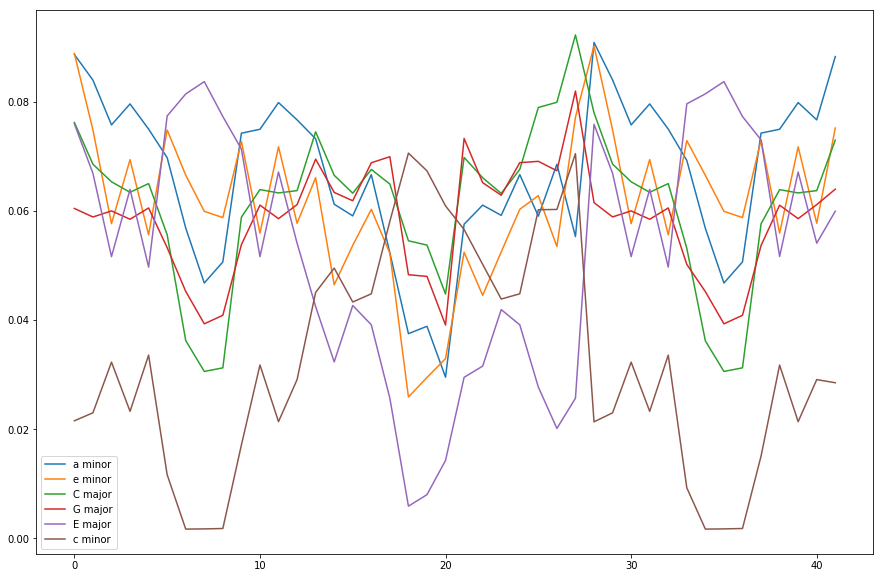

In [100]:
keys, kprobs = mm.keys(mm.X)
plt.figure(figsize=(15,10))
plt.legend(plt.plot(kprobs), [arr.keys[i] for i in keys], loc=0)
plt.show()

In [101]:
%%time
mm1 = MarkovModulation(arr.table, maxiter=100, quantize=6, delta=.01)
mm1.fit(mg, tg)

CPU times: user 1.05 s, sys: 247 ms, total: 1.3 s
Wall time: 1.34 s


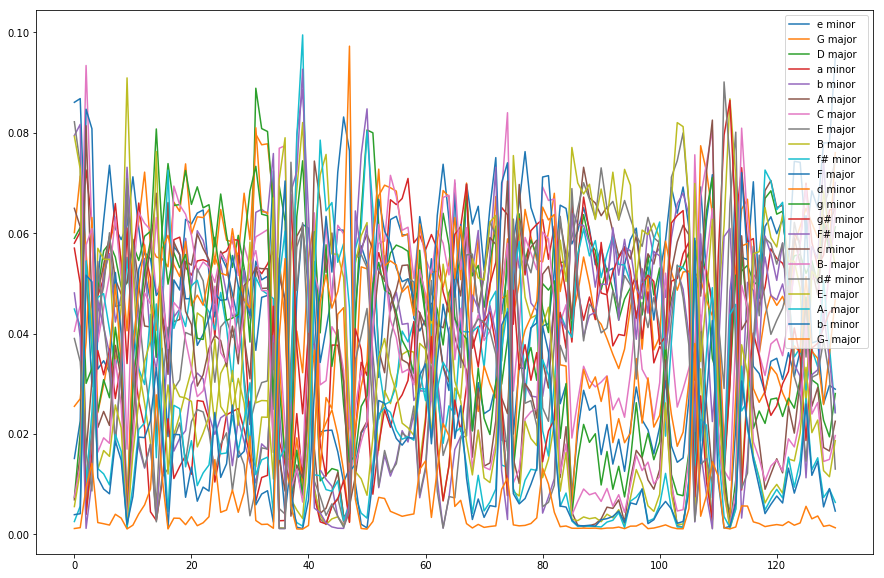

In [102]:
keys, kprobs = mm1.keys(mm1.X)
plt.figure(figsize=(15,10))
plt.legend(plt.plot(kprobs), [arr.keys[i] for i in keys], loc=0)
plt.show()

From these it can be seen that having spatially extended regions gives much cleaner estimates of which key is active at each time instant than treating keys as hidden states of an HMM, and may give similar performances for more complicated models where the distribution the hidden states define on the notes are neither fixed nor iid (either dependent on time or with linear dependencies e.g. in an HMM).

Later, the fixed distributions $p(n|k)$ may be replaced with Dirichlet random variables whose prior parameters are taken from counts in the table, and multiple sequences may be considered in their inference. May also come up with hierarchical Markov models where keys are just one component of the features exhibited in a region, allowing for other features such as chords, melodies and large-scale forms which may also constitute hidden states in a mixture of HMMs.